# Supplementary figure 2: ECM patch clusters in real murine dataset

Images are split into NxHxC where N is the number of ECM markers, split into 5x5 patches and clustered into 4 clusters. The ECM patches from all ROIs are jointly clusterted and visualized in a single image 

Note: 
All ROI cell-ECM graphs are built here and saved for later use

In [3]:
# Standard library imports
import os
import sys
import random
from collections import Counter

# Third-party library imports
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns


# Local module imports
os.chdir('C:/Users/Adminn/Documents/GitHub/CEG/src')
from Graph_builder import *  # Import graph-building utilities
from permutation_test import *  # Import permutation test utilities
from CellECMGraphs_multiple import *  # Import Cell-ECM graph utilities
from Helper_functions import *  # Import helper functions

# Set random seeds for reproducibility
random.seed(42)
np.random.seed(42)

# Set paths for data directories
full_stack_img_dir = np.sort(glob('D:/raw/*/img/*')) # Path to IMC files 
panel_path = "C:/Users/Adminn/Downloads/panel.csv" # Path to panel - with ECM column 
cell_data_dir = np.sort(glob("C:/Users/Adminn/Desktop/PhD/cell_ECM_graphs/data/cell_data/*")) # Path to cell data files - cell types/centroids

In [ ]:
save_folder = 'C:/Users/Adminn/Documents/GitHub/Cell_ECM_Graphs_Publication/Notebooks/figure_3/fig3_results/'

# Initialize the Cell_ECM_Graphs 
ceg = Cell_ECM_Graphs(full_stack_img_path=full_stack_img_dir, 
                panel_path=panel_path,
                cell_data_path=cell_data_dir,
                save_folder=save_folder,
                )

# Build cell-ECM graphs for all regions of interest (ROIs)
ceg.build_multiple_graphs(Dmax_CC=17, Dmax_CE=7, interaction_k=5)

# Cluster all ECM patches of all ROIs together 
ceg.joint_ecm_clustering() 


Building Cell-ECM-Graphs...
ROI 0 complete.
ROI 1 complete.
ROI 2 complete.
ROI 3 complete.
ROI 4 complete.
ROI 5 complete.
ROI 6 complete.
ROI 7 complete.
ROI 8 complete.
ROI 9 complete.
ROI 10 complete.
ROI 11 complete.
ROI 12 complete.
ROI 13 complete.
ROI 14 complete.
ROI 15 complete.
ROI 16 complete.
ROI 17 complete.
ROI 18 complete.
ROI 19 complete.
ROI 20 complete.
ROI 21 complete.
ROI 22 complete.
ROI 23 complete.
ROI 24 complete.
ROI 25 complete.
ROI 26 complete.
ROI 27 complete.
ROI 28 complete.
ROI 29 complete.
ROI 30 complete.
ROI 31 complete.
ROI 32 complete.
ROI 33 complete.
ROI 34 complete.
ROI 35 complete.
Clustering all ECM patches together ... 


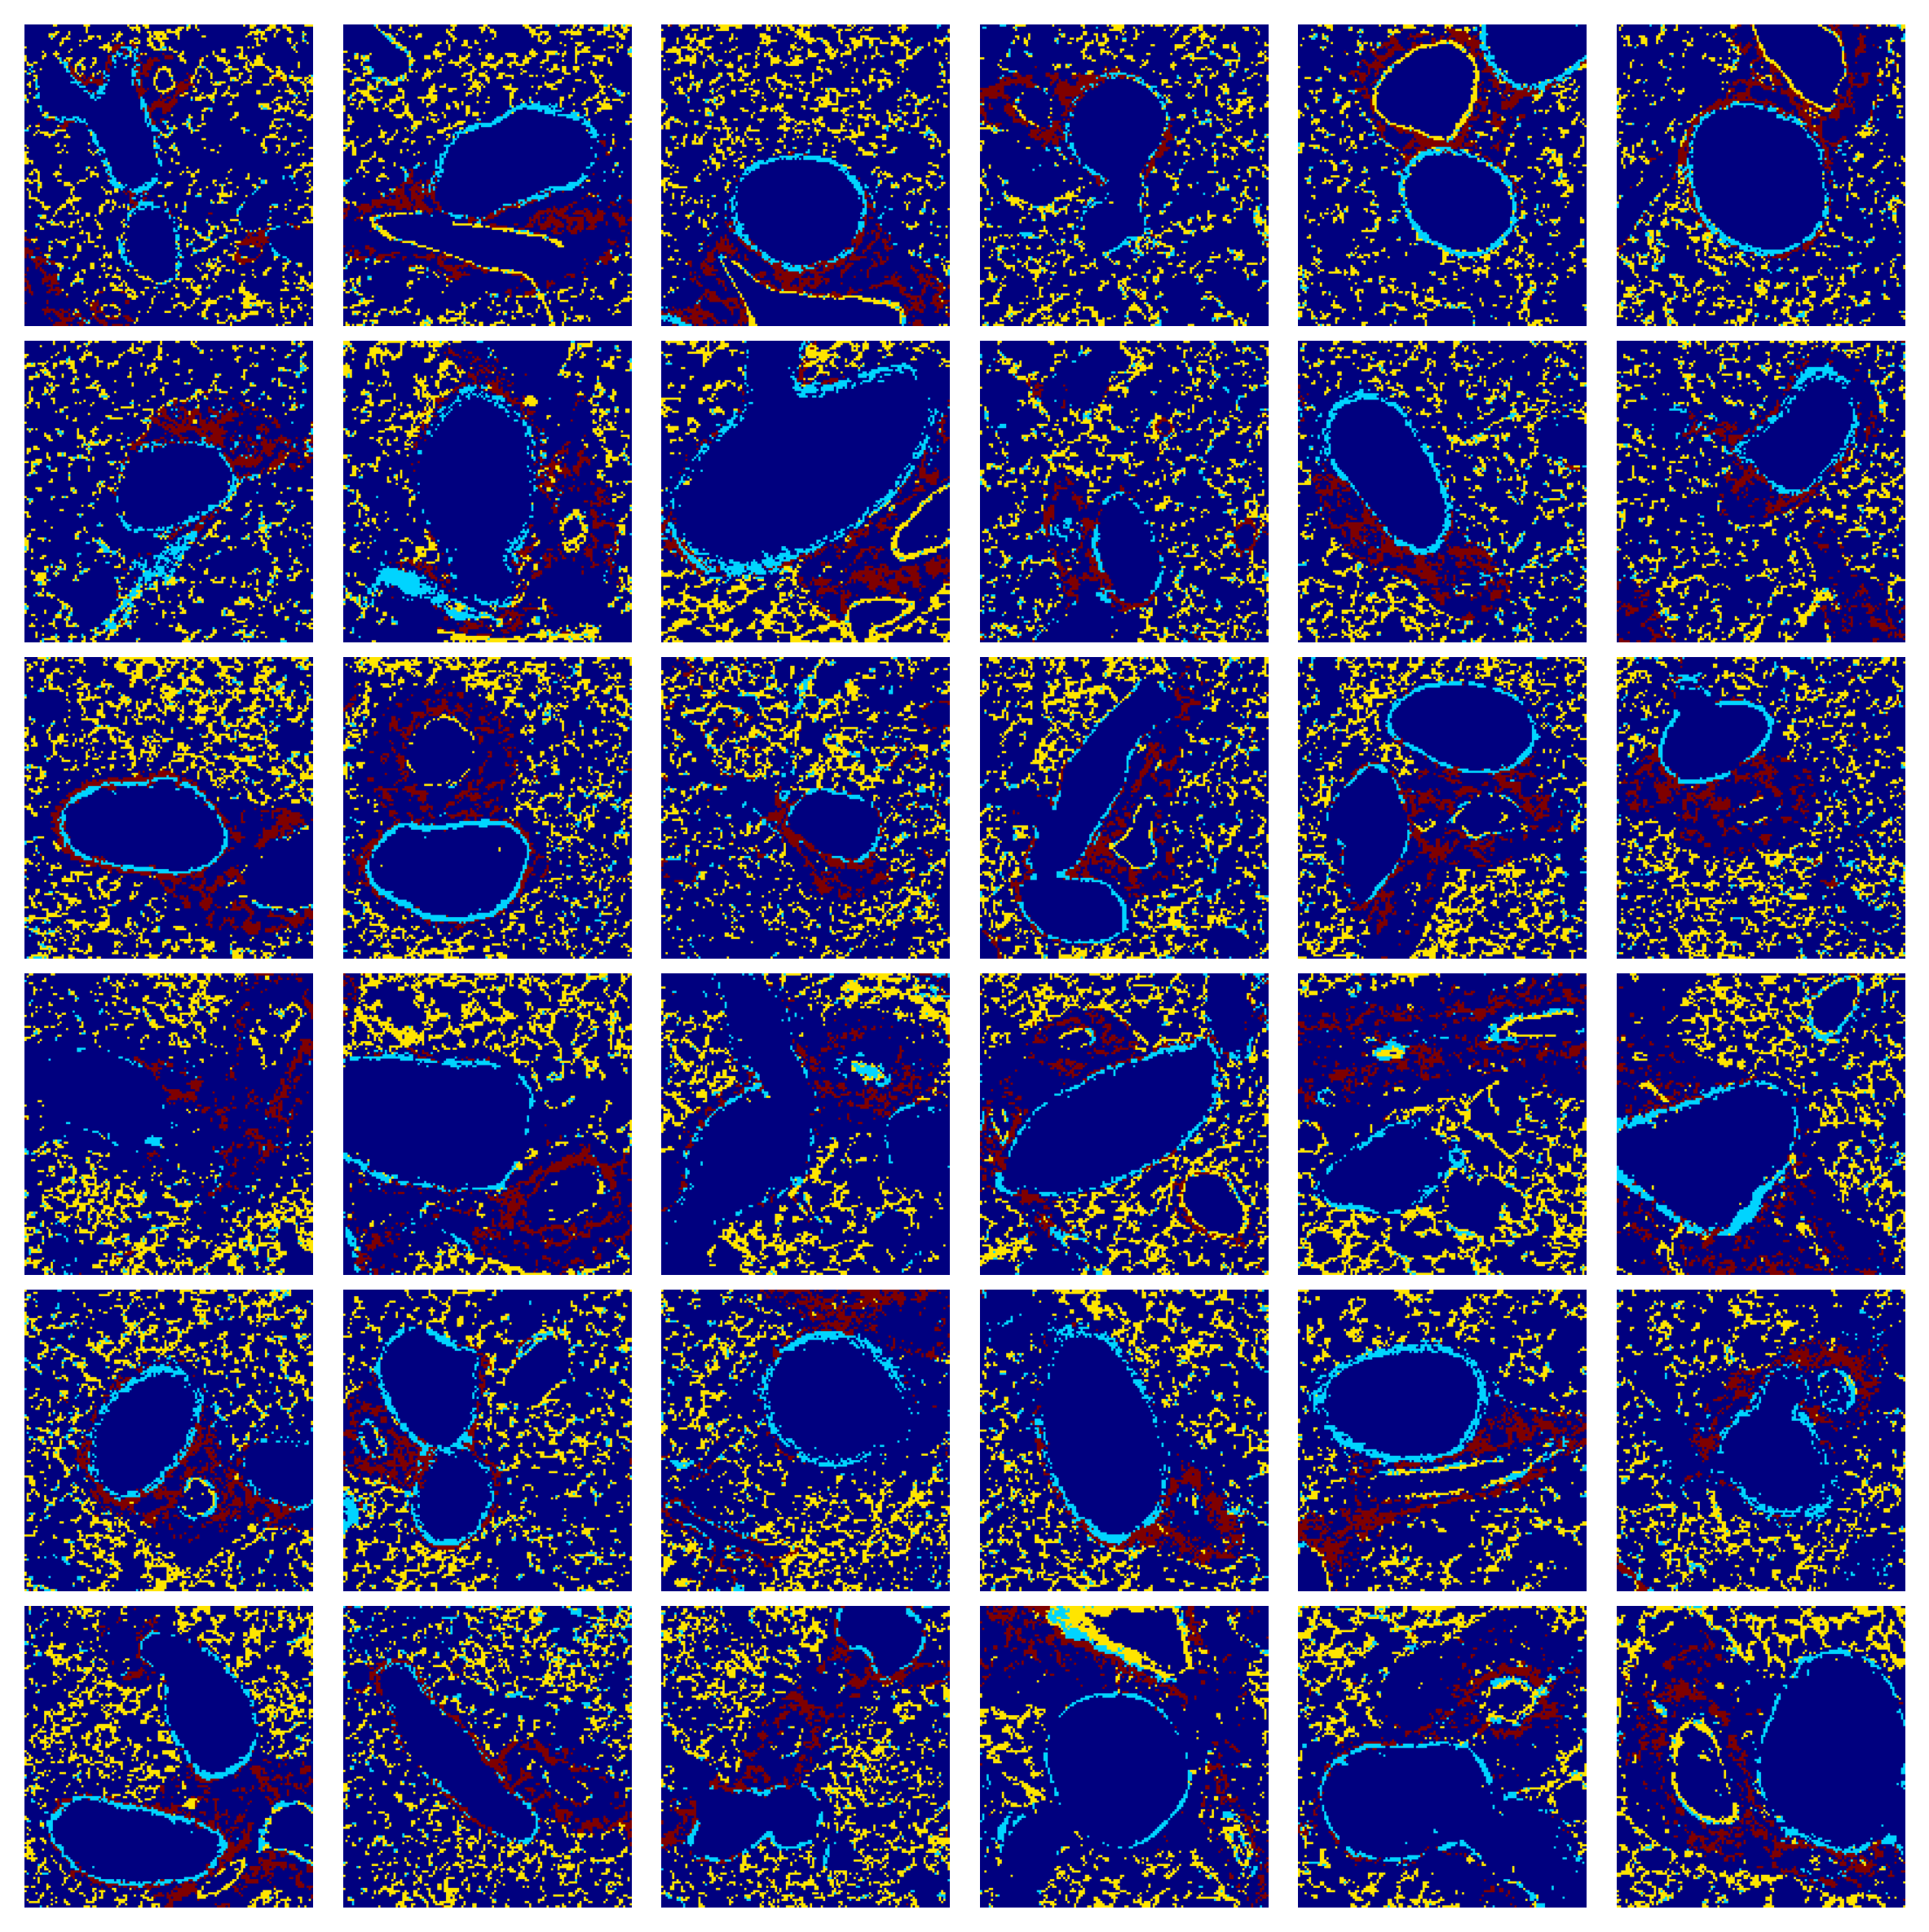

In [5]:

# Access ECM clusters and their corresponding images
recon_imgs = []
for i in ceg.ceg_dict:
    recon_imgs.append(ceg.ceg_dict[i].reconstructed_image)

# Visualize the ECM patch clusters of all ROIs 
plot_36_images(recon_imgs, save_path='all_ROI_ecm_clusters.tiff')


In [6]:
import dill 

# Save the CellECMGraph object to a file using dill
def save_ceg(ceg, savename):
    """
    Save the CellECMGraph object to a file using dill.
    """
    with open(savename, "wb") as f:
        dill.dump(ceg, f)


# Save the CellECMGraph objects of all ROIs
save_ceg(ceg, "D:/built_CEGs/cell_ecm_graphs.dill")
